# **ELT574 - Aprendizado de Máquinas**
**Roteiro dirigido da Semana 3**



Crie um Notebook no Google Colab com o nome [ELT574 Semana 3 <Matrícula>], modificando o campo <Matrícula> pela sua matrícula do Sapiens (Exemplo: ELT574 Semana 3 12700-0). Conforme o roteiro abaixo, responda os questionamento e implemente rotinas para realizar os cálculos necessários.


1. Como relacionar as redes neurais artificiais com as células neurais?

2. Quais são as funções de ativação mais utilizadas nas redes neurais artificiais. Desenhe os gráficos de cada uma.

3. Suponha uma rede PMC composta por uma camada de entrada com 10 neurônios, conectada com uma camada escondida com 50 neurônios artificiais e uma camada de saída com 3 neurônios artificiais. Todos os neurônios utilizam a função de ativação ReLU.

> 3.1. Qual é o formato da matriz de entrada X?
>
> 3.2. Quais são os formatos das matrizes de pesos (Wh) e da matriz de limiares de ativação (bh) da camada escondida?
>
> 3.3. Quais são os formatos das matrizes de pesos (Wo) e da matriz de limiares de ativação (bo) da camada de saída?
>
> 3.4. Qual o formato da matriz de saída Y da rede PMC?
>
> 3.5 Escreva a equação que computa a saída Y da rede PMC em função de X, Wh, bh, Wo, e bo.

4. Quantos neurônios na camada de saída são necessários para uma rede PMC classificar um e-mail em "Spam" ou "Não-spam"? Qual função de ativação deve ser utilizada na camada de saída desta rede PMC?

5. Se você quiser construir uma rede neural artificial que identifique números escritos a mão, de 0 a 10, quantos neurônios seriam necessários na camada de saída da rede? Qual função de ativação deve ser utilizada? Por quê?

6. Utilize o notebook disponibilizado para o problema de classificação multiclasse e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 98% de precisão nas inferências. Apresente o gráfico de treinamento e validação da função de loss. Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.

Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como resposta da tarefa.

## Resposta 1

No campo da Inteligência Artificial e, particularmente, do aprendizado de máquina, costumamos falar que o computador aprende com os dados que lhe são apresentados.

Em razão dessa capacidade, é comum fazermos uma analogia com o funcionamento do cérebro humano, ainda que nenhuma máquina se compare à aptidão do ser humano de se adquirir conhecimento e de se adaptar a novas situações.

A analogia referida diz respeito ao fato de que o cérebro humano é formado por bilhões de neurônios interligados em rede, que se conectam pelas sinapses, permitindo a passagem de eletricidade entre as céluas. Quanto mais evoluída a espécie, maior a complexidade da rede neural que nela pode ser observada.

Voltando aos computadores, tem-se que as redes neurais artificiais são formadas por unidades, que também são denominadas neurônios, que armazenam um vetor de pesos (números de ponto flutuante). Esse vetor é combinado com um vetor de entradas passado para o neurônio (produto escalar). O neurônio executa uma função, chamada função de ativação (quase sempre não linear) e produz uma saída.

O perceptron é a rede neural artificial mais simples, constituída por um único neurônio. Ele pode ter ```n``` entradas, representadas pelo vetor de entrada ```X = [x1, x2, ..., xn]``` e uma saída, ```y```. Cada neurônio apresenta características de pesos sinápticos ```W = [w1, w2, ..., wn]``` e um potencial limiar de ativação ```b``` (_bias_) para que a função de ativação ```g(.)``` altere a saída ```y```. 

Redes mais complexas possuem diversas camadas sequenciais de neurônios artificiais (camadas ocultas) e podem ser úteis para fazer previsões ou classificações por meio de uma função desconhecida de aproximação.

## Resposta 2

As principais funções de ativação são as seguintes:

1. De etapa binária

Nessa modalidade:

f(x) = 1, x >= 0

f(x) = 0, x < 0

Problema relacionado a essa função é descontínua e não é diferenciável. Por esse motivo, não é a mais adequada para ajusar modelos com gradiente descendente. 


2. Linear

f(x) = ax

3. Sigmoide 

f(x) = 1/(1 + e ^ -x)

4. Tangente hiperbólica (tanh)

f(x) = (2/1 + e^ (-2 * B * x)) - 1 , onde B é a inclinação de tangente hiperbólica.  

5. ReLU (Rectified Linear Unit): retorna o valor de entrada se for positivo; caso contrário, retorna 0


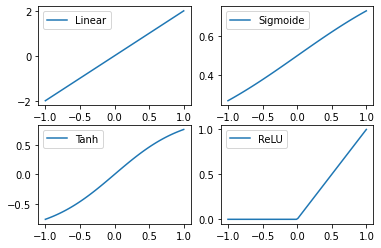

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Série de valores de entrada
x = np.linspace(-1, 1, 100)

# Funções de ativação
a, b = 2, 0
linear = a*x + b
sigmoide = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

# Divisão da figura em 4 subplots

plt.subplot(2, 2, 1)
plt.plot(x, linear, label='Linear')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, sigmoide, label='Sigmoide')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, tanh, label='Tanh')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, relu, label='ReLU')
plt.legend()

plt.show()

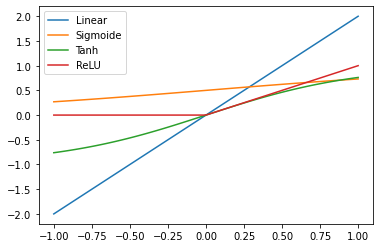

In [ ]:
plt.plot(x, linear, label='Linear')
plt.legend()

plt.plot(x, sigmoide, label='Sigmoide')
plt.legend()

plt.plot(x, tanh, label='Tanh')
plt.legend()

plt.plot(x, relu, label='ReLU')
plt.legend()

plt.show()

## Resposta 3

3.1. A matriz de entrada depende do número de exemplos e número de features de cada exemplo. Se o proposição afirma que há 10 neurônios na entrada, pode-se presumir que os exemplos se caracterizem por 10 features. Assim, se tivermos 200 exemplos, a matriz de entrada será 200 x 10.

3.2. A matriz de pesos (Wh) tem formato 50 x 10, porque as linhas representam os neurônios da camada escondida e as colunas os neurônios da camada de entrada.

A matriz de limiares de ativação (bh) é dada pelo número de neurônios na camada escondida, que, no caso é 50, pelo peso de cada conexão. Logo, tem formato 50 x 1. 

3.3. A matriz Wo corresponde ao número de neurônios na camada de saída e ao número de neurônios da camada escondida. No caso, será do formato 50 x 3. Já a matriz de limiares de ativação para a camada de saída será do formato 3 x 1, considerando a existência de 3 neurônios na saída com um único limiar de ativação para cada elemento.

3.4. A matriz da saída tem o formato ditado pelos exemplos apresentados no treinamento e o número de neurônios de saída. Se o treinamento tivesse sido feito com 200 exemplos, teríamos uma matriz de saída de formato 200 x 3.

3.5. A equação de saída é a seguinte:

Z = X * Wh + bh

A = f(Z)

Y = A * Wo + bo

Onde X é a matriz de entrada, Wh é a matriz de pesos da camada escondida, bh é a matriz de limiares de ativação da camada escondida, Wo é a matriz de pesos da camada de saída, bo é a matriz de limiares de ativação da camada de saída, e f é a função de ativação da camada escondida (no caso, ReLu).

Em conclusão:

$$ f(x) = ReLu(Wo) + bo $$


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Criação do modelo
model = Sequential()

# Adicionando a camada de entrada
model.add(Dense(10, input_dim=10, activation='relu'))

# Adicionando a camada escondida
model.add(Dense(50, activation='relu'))

# Adicionando a camada de saída
model.add(Dense(3, activation='relu'))

# Compilação do modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Plotando o modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 50)                550       
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


## Resposta 4

Para um classificador de e-mails como ham ou spam é preciso apenas um único neurônio de saída. A função de ativação logística é adequada para essa tarefa, em que não se exige probabilidade na saída.

## Resposta 5
Para o reconhecimento de caracteres de 0 a 9 são precisos 10 neurônios de saída, um para cada classe. Nesse caso, a função de ativação Softmax é recomendada, pois ela fará com que as probabilidades se situem entre 0 e 1 e que a soma de todas as probabilidades seja 1 (classificação multiclasse, adequada para classes mutuamente exclusivas).

## Resposta 6

In [ ]:
# Setup básico
# TensorFlow e tf.keras

import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregando o banco de dados "Fashion MNIST"

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Inspeções iniciais

print("len:", len(train_images))
print("len(imagem única): ", len(train_images[0]))
print("shape:", train_images[0].shape)
print("type:", type(train_images))

len: 60000
len(imagem única):  28
shape: (28, 28)
type: <class 'numpy.ndarray'>


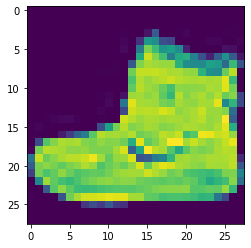

In [ ]:
# Inspecionando a primeira imagem:

plt.imshow(train_images[0])
plt.show()

In [ ]:
# Pré-processamento para que os valores estejam compreendidos no intervalo 0, 1

train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
# Criando o dataset de validação

valid_images, train_images = train_images[:5000], train_images[5000:]
valid_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [ ]:
# Criando uma função para representar o modelo que sera treinado

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss='mse', optimizer=optimizer, metrics=["accuracy"]) # metrics incluído após msg de erro
  return model

In [ ]:
# Criando o classificador baseado na função acima
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

keras_clf.fit(train_images, train_labels, 
              epochs=100, 
              validation_data=(valid_images, valid_labels), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]) # parada precipitada para evitar overfitting.

<ipython-input-11-be544f2939f6>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)


Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 8.6297 - accuracy: 0.0989 - val_loss: 8.2431 - val_accuracy: 0.1112
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 8.2726 - accuracy: 0.0990 - val_loss: 8.2384 - val_accuracy: 0.1112
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 8.2676 - accuracy: 0.0990 - val_loss: 8.2338 - val_accuracy: 0.1112
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2667 - accuracy: 0.0990 - val_loss: 8.2343 - val_accuracy: 0.1112
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2621 - accuracy: 0.0990 - val_loss: 8.2543 - val_accuracy: 0.1112
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 8.2624 - accuracy: 0.0990 - val_loss: 8.2368 - val_accuracy: 0.1112
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2629 - accuracy: 0.0990 - val_loss: 8.2316 - val_ac

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV # implementa a k-fold cross-validation

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(train_images, train_labels, epochs=100, 
                  validation_data=(valid_images, valid_labels), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 3s 2ms/step - loss: 8.8927 - accuracy: 0.0996 - val_loss: 8.2528 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2987 - accuracy: 0.0996 - val_loss: 8.2388 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2959 - accuracy: 0.0996 - val_loss: 8.2330 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2913 - accuracy: 0.0996 - val_loss: 8.2477 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2907 - accuracy: 0.0996 - val_loss: 8.2431 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2910 - accuracy: 0.0996 - val_loss: 8.2306 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2886 - accuracy: 0.0996 - val_loss: 8.2531 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 3s 2ms/step - loss: 8.8371 - accuracy: 0.0992 - val_loss: 8.2485 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2466 - accuracy: 0.0993 - val_loss: 8.2502 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2422 - accuracy: 0.0993 - val_loss: 8.2491 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2396 - accuracy: 0.0993 - val_loss: 8.2321 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2398 - accuracy: 0.0993 - val_loss: 8.2712 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2397 - accuracy: 0.0993 - val_loss: 8.2297 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2359 - accuracy: 0.0993 - val_loss: 8.2350 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 8.8726 - accuracy: 0.0980 - val_loss: 8.2346 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2527 - accuracy: 0.0980 - val_loss: 8.2322 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2491 - accuracy: 0.0980 - val_loss: 8.2330 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2512 - accuracy: 0.0980 - val_loss: 8.2327 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2485 - accuracy: 0.0980 - val_loss: 8.2364 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 2s 2ms/step - loss: 8.2484 - accuracy: 0.0980 - val_loss: 8.2326 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.2489 - accuracy: 0.0980 - val_loss: 8.2422 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 4ms/step - loss: 8.6108 - accuracy: 0.0996 - val_loss: 8.2705 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.3053 - accuracy: 0.0996 - val_loss: 8.2923 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.3053 - accuracy: 0.0996 - val_loss: 8.2322 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.3045 - accuracy: 0.0996 - val_loss: 8.3927 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3096 - accuracy: 0.0996 - val_loss: 8.2478 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.3035 - accuracy: 0.0996 - val_loss: 8.2445 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.3004 - accuracy: 0.0996 - val_loss: 8.2369 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 8.5364 - accuracy: 0.0993 - val_loss: 8.2364 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2570 - accuracy: 0.0993 - val_loss: 8.2811 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2510 - accuracy: 0.0993 - val_loss: 8.2358 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2550 - accuracy: 0.0993 - val_loss: 8.2513 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2453 - accuracy: 0.0993 - val_loss: 8.2368 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2500 - accuracy: 0.0993 - val_loss: 8.2289 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2480 - accuracy: 0.0993 - val_loss: 8.2285 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 8.5824 - accuracy: 0.0980 - val_loss: 8.2626 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2723 - accuracy: 0.0980 - val_loss: 8.2370 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2689 - accuracy: 0.0980 - val_loss: 8.2302 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2680 - accuracy: 0.0980 - val_loss: 8.2301 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2648 - accuracy: 0.0980 - val_loss: 8.2296 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2650 - accuracy: 0.0980 - val_loss: 8.2664 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2593 - accuracy: 0.0980 - val_loss: 8.2609 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 11.0985 - accuracy: 0.0994 - val_loss: 8.7451 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.4620 - accuracy: 0.0996 - val_loss: 8.2692 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3043 - accuracy: 0.0996 - val_loss: 8.2473 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2936 - accuracy: 0.0996 - val_loss: 8.2376 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2896 - accuracy: 0.0996 - val_loss: 8.2381 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2897 - accuracy: 0.0996 - val_loss: 8.2342 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2894 - accuracy: 0.0996 - val_loss: 8.2335 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 10.9676 - accuracy: 0.0998 - val_loss: 8.7261 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.4018 - accuracy: 0.0993 - val_loss: 8.2780 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2512 - accuracy: 0.0993 - val_loss: 8.2427 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2407 - accuracy: 0.0993 - val_loss: 8.2522 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2392 - accuracy: 0.0993 - val_loss: 8.2466 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2385 - accuracy: 0.0993 - val_loss: 8.2367 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2383 - accuracy: 0.0993 - val_loss: 8.2358 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 11.1737 - accuracy: 0.0979 - val_loss: 8.8320 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.4688 - accuracy: 0.0980 - val_loss: 8.2713 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2663 - accuracy: 0.0980 - val_loss: 8.2397 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2530 - accuracy: 0.0980 - val_loss: 8.2369 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2510 - accuracy: 0.0980 - val_loss: 8.2373 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2509 - accuracy: 0.0980 - val_loss: 8.2348 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2494 - accuracy: 0.0980 - val_loss: 8.2406 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 8.6119 - accuracy: 0.0996 - val_loss: 8.2369 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.3118 - accuracy: 0.0996 - val_loss: 8.2923 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3070 - accuracy: 0.0996 - val_loss: 8.2493 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2997 - accuracy: 0.0996 - val_loss: 8.2321 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3022 - accuracy: 0.0996 - val_loss: 8.2518 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.3020 - accuracy: 0.0996 - val_loss: 8.2319 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2982 - accuracy: 0.0996 - val_loss: 8.2851 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 8.5799 - accuracy: 0.0993 - val_loss: 8.2390 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2601 - accuracy: 0.0993 - val_loss: 8.2503 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2515 - accuracy: 0.0993 - val_loss: 8.2734 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2551 - accuracy: 0.0993 - val_loss: 8.2312 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2552 - accuracy: 0.0993 - val_loss: 8.2804 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2470 - accuracy: 0.0993 - val_loss: 8.2402 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2496 - accuracy: 0.0993 - val_loss: 8.2570 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 8.5725 - accuracy: 0.0979 - val_loss: 8.2350 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2692 - accuracy: 0.0980 - val_loss: 8.2363 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2677 - accuracy: 0.0980 - val_loss: 8.2313 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2663 - accuracy: 0.0980 - val_loss: 8.2304 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2618 - accuracy: 0.0980 - val_loss: 8.2874 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2649 - accuracy: 0.0980 - val_loss: 8.2328 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2603 - accuracy: 0.0980 - val_loss: 8.2873 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 3s 3ms/step - loss: 13.9290 - accuracy: 0.0991 - val_loss: 11.2924 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 3s 2ms/step - loss: 10.7472 - accuracy: 0.0996 - val_loss: 10.1779 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 3s 2ms/step - loss: 9.8782 - accuracy: 0.0996 - val_loss: 9.4884 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 3ms/step - loss: 9.3181 - accuracy: 0.0996 - val_loss: 9.0556 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 3s 3ms/step - loss: 8.9699 - accuracy: 0.0996 - val_loss: 8.7785 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.7422 - accuracy: 0.0996 - val_loss: 8.5999 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.5916 - accuracy: 0.0996 - val_loss: 8.4826 - val_accuracy: 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 3s 3ms/step - loss: 14.1165 - accuracy: 0.0991 - val_loss: 11.0792 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 3s 2ms/step - loss: 10.5295 - accuracy: 0.0993 - val_loss: 10.0687 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 9.7281 - accuracy: 0.0993 - val_loss: 9.4351 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 9.2218 - accuracy: 0.0993 - val_loss: 9.0288 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.8878 - accuracy: 0.0993 - val_loss: 8.7660 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.6732 - accuracy: 0.0993 - val_loss: 8.5945 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.5332 - accuracy: 0.0993 - val_loss: 8.4814 - val_accuracy: 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 3s 2ms/step - loss: 13.7159 - accuracy: 0.0981 - val_loss: 11.2487 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 3s 2ms/step - loss: 10.7289 - accuracy: 0.0980 - val_loss: 10.1722 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 4s 3ms/step - loss: 9.8612 - accuracy: 0.0980 - val_loss: 9.4937 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 9.3055 - accuracy: 0.0980 - val_loss: 9.0607 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 3s 3ms/step - loss: 8.9508 - accuracy: 0.0980 - val_loss: 8.7809 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 3s 2ms/step - loss: 8.7155 - accuracy: 0.0980 - val_loss: 8.5994 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.5604 - accuracy: 0.0980 - val_loss: 8.4813 - val_accuracy: 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 11.7798 - accuracy: 0.0999 - val_loss: 9.1323 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.6856 - accuracy: 0.0996 - val_loss: 8.3509 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 8.3501 - accuracy: 0.0996 - val_loss: 8.2646 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3098 - accuracy: 0.0996 - val_loss: 8.2503 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.3022 - accuracy: 0.0996 - val_loss: 8.2455 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2973 - accuracy: 0.0996 - val_loss: 8.2458 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2962 - accuracy: 0.0996 - val_loss: 8.2423 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 4ms/step - loss: 11.7560 - accuracy: 0.0987 - val_loss: 9.0923 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.6228 - accuracy: 0.0993 - val_loss: 8.3605 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.3015 - accuracy: 0.0993 - val_loss: 8.2687 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2617 - accuracy: 0.0993 - val_loss: 8.2561 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2542 - accuracy: 0.0993 - val_loss: 8.2524 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2493 - accuracy: 0.0993 - val_loss: 8.2470 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2465 - accuracy: 0.0993 - val_loss: 8.2450 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 4s 3ms/step - loss: 11.2680 - accuracy: 0.0981 - val_loss: 9.1927 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.6655 - accuracy: 0.0980 - val_loss: 8.3499 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3042 - accuracy: 0.0980 - val_loss: 8.2581 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2660 - accuracy: 0.0980 - val_loss: 8.2491 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2599 - accuracy: 0.0980 - val_loss: 8.2463 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2579 - accuracy: 0.0980 - val_loss: 8.2439 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2547 - accuracy: 0.0980 - val_loss: 8.2418 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 5ms/step - loss: 8.4995 - accuracy: 0.0995 - val_loss: 8.2752 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3301 - accuracy: 0.0996 - val_loss: 8.3037 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.3165 - accuracy: 0.0996 - val_loss: 8.2613 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3067 - accuracy: 0.0996 - val_loss: 8.2327 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.3040 - accuracy: 0.0996 - val_loss: 8.2287 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2975 - accuracy: 0.0996 - val_loss: 8.2360 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2943 - accuracy: 0.0996 - val_loss: 8.2277 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 6ms/step - loss: 8.4575 - accuracy: 0.0993 - val_loss: 8.2435 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2677 - accuracy: 0.0993 - val_loss: 8.2697 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2648 - accuracy: 0.0993 - val_loss: 8.2311 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2556 - accuracy: 0.0993 - val_loss: 8.2284 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2487 - accuracy: 0.0993 - val_loss: 8.2280 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2499 - accuracy: 0.0993 - val_loss: 8.2840 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2441 - accuracy: 0.0993 - val_loss: 8.3455 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 7s 5ms/step - loss: 8.5020 - accuracy: 0.0981 - val_loss: 8.2596 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2858 - accuracy: 0.0980 - val_loss: 8.2312 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2710 - accuracy: 0.0980 - val_loss: 8.3105 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2661 - accuracy: 0.0980 - val_loss: 8.2702 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2618 - accuracy: 0.0980 - val_loss: 8.2371 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2585 - accuracy: 0.0980 - val_loss: 8.2306 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2544 - accuracy: 0.0980 - val_loss: 8.2630 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 8.6170 - accuracy: 0.0994 - val_loss: 8.2455 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.3134 - accuracy: 0.0996 - val_loss: 8.2354 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3056 - accuracy: 0.0996 - val_loss: 8.2415 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.3038 - accuracy: 0.0996 - val_loss: 8.2508 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2996 - accuracy: 0.0996 - val_loss: 8.2515 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.3008 - accuracy: 0.0996 - val_loss: 8.2321 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2989 - accuracy: 0.0996 - val_loss: 8.2294 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 8.5947 - accuracy: 0.0993 - val_loss: 8.2773 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2755 - accuracy: 0.0993 - val_loss: 8.2442 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2604 - accuracy: 0.0993 - val_loss: 8.2976 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2613 - accuracy: 0.0993 - val_loss: 8.2417 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2492 - accuracy: 0.0993 - val_loss: 8.2373 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2487 - accuracy: 0.0993 - val_loss: 8.2310 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2470 - accuracy: 0.0993 - val_loss: 8.2596 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 8.5170 - accuracy: 0.0979 - val_loss: 8.2424 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2770 - accuracy: 0.0980 - val_loss: 8.2876 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2742 - accuracy: 0.0980 - val_loss: 8.2330 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2640 - accuracy: 0.0980 - val_loss: 8.2330 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2637 - accuracy: 0.0980 - val_loss: 8.2298 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 3ms/step - loss: 8.2628 - accuracy: 0.0980 - val_loss: 8.2872 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2574 - accuracy: 0.0980 - val_loss: 8.2312 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 8s 6ms/step - loss: 10.8675 - accuracy: 0.0996 - val_loss: 8.5246 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.3756 - accuracy: 0.0996 - val_loss: 8.2515 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.2999 - accuracy: 0.0996 - val_loss: 8.2604 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.2968 - accuracy: 0.0996 - val_loss: 8.2392 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 6s 6ms/step - loss: 8.2941 - accuracy: 0.0996 - val_loss: 8.2383 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.2931 - accuracy: 0.0996 - val_loss: 8.2350 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.2903 - accuracy: 0.0996 - val_loss: 8.2362 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 9s 7ms/step - loss: 10.4311 - accuracy: 0.0989 - val_loss: 8.4054 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.3020 - accuracy: 0.0993 - val_loss: 8.2561 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.2537 - accuracy: 0.0993 - val_loss: 8.2947 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.2482 - accuracy: 0.0993 - val_loss: 8.2489 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.2434 - accuracy: 0.0993 - val_loss: 8.2412 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.2431 - accuracy: 0.0993 - val_loss: 8.2416 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.2421 - accuracy: 0.0993 - val_loss: 8.2428 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 8s 6ms/step - loss: 11.0209 - accuracy: 0.0981 - val_loss: 8.4847 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.3493 - accuracy: 0.0980 - val_loss: 8.2753 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.2802 - accuracy: 0.0980 - val_loss: 8.2810 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.2722 - accuracy: 0.0980 - val_loss: 8.2615 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.2628 - accuracy: 0.0980 - val_loss: 8.2653 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 7s 6ms/step - loss: 8.2623 - accuracy: 0.0980 - val_loss: 8.2548 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 8s 7ms/step - loss: 8.2591 - accuracy: 0.0980 - val_loss: 8.2426 - val_accuracy: 0.1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 8.8963 - accuracy: 0.0995 - val_loss: 8.2383 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2984 - accuracy: 0.0996 - val_loss: 8.2331 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2985 - accuracy: 0.0996 - val_loss: 8.2306 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2969 - accuracy: 0.0996 - val_loss: 8.2444 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2967 - accuracy: 0.0996 - val_loss: 8.2387 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2965 - accuracy: 0.0996 - val_loss: 8.2632 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2978 - accuracy: 0.0996 - val_loss: 8.2291 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 6s 5ms/step - loss: 8.8319 - accuracy: 0.0994 - val_loss: 8.2455 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2493 - accuracy: 0.0993 - val_loss: 8.2794 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2445 - accuracy: 0.0993 - val_loss: 8.2635 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2410 - accuracy: 0.0993 - val_loss: 8.2864 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2450 - accuracy: 0.0993 - val_loss: 8.2308 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 6s 5ms/step - loss: 8.2430 - accuracy: 0.0993 - val_loss: 8.2396 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2394 - accuracy: 0.0993 - val_loss: 8.2319 - val_accuracy: 0.11

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1146/1146 [==============================] - 5s 4ms/step - loss: 8.8905 - accuracy: 0.0979 - val_loss: 8.2554 - val_accuracy: 0.1112
Epoch 2/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2646 - accuracy: 0.0980 - val_loss: 8.2407 - val_accuracy: 0.1112
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 8.2545 - accuracy: 0.0980 - val_loss: 8.2327 - val_accuracy: 0.1112
Epoch 4/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2553 - accuracy: 0.0980 - val_loss: 8.2357 - val_accuracy: 0.1112
Epoch 5/100
1146/1146 [==============================] - 5s 5ms/step - loss: 8.2573 - accuracy: 0.0980 - val_loss: 8.2362 - val_accuracy: 0.1112
Epoch 6/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2553 - accuracy: 0.0980 - val_loss: 8.2332 - val_accuracy: 0.1112
Epoch 7/100
1146/1146 [==============================] - 4s 4ms/step - loss: 8.2557 - accuracy: 0.0980 - val_loss: 8.2293 - val_accuracy: 0.11

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8d82f2d6a0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d86421880>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
# Melhores parâmetros
rnd_search_cv.best_params_

{'learning_rate': 0.007725735055557725, 'n_hidden': 0, 'n_neurons': 33}